# Nepali Vegetable Market Data Analysis

I came across this dataset on Kaggle while looking for dataset based in Nepal. This data interestingly originates from a vegetable market I used to frequently go to. Although the data appears to be limited, I am eager to explore and see what insights I can uncover.

In [1]:
#Importing the relevant packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Reading the file
df = pd.read_csv("../downloads/kalimati_tarkari_dataset.csv")

In [3]:
#Seeing what the data looks like
df.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


In [4]:
# rename columns to avoid confusion
df = df.rename(columns={"Minimum": "Min Price", "Maximum": "Max Price", "Average": "Avg Price"})

In [5]:
#getting details about the data
df.describe()

,SN,Min Price,Max Price,Avg Price
count,197161.000000,197161.000000,197161.000000,197161.000000
mean,98580.000000,85.423938,94.161284,89.792611
std,56915.622549,77.058896,82.375858,79.619003
min,0.000000,1.000000,6.000000,5.000000
25%,49290.000000,40.000000,45.000000,42.500000
50%,98580.000000,60.000000,70.000000,65.000000
75%,147870.000000,100.000000,110.000000,105.000000
max,197160.000000,1800.000000,2000.000000,1900.000000


In [6]:
#Checking for nulls
df.isnull().sum()

SN           0
Commodity    0
Date         0
Unit         0
Min Price    0
Max Price    0
Avg Price    0
dtype: int64

In [7]:
#looking at the type of data in the columns
df.dtypes

SN             int64
Commodity     object
Date          object
Unit          object
Min Price    float64
Max Price    float64
Avg Price    float64
dtype: object

In [8]:
# convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
#drop SN since it seems to be a serial number that is same as the index
df.drop(["SN"], axis = 1, inplace=True)

In [10]:
#Ensuring the text data is consistently formatted
df['Unit'] = df['Unit'].str.lower()
df['Commodity'] = df['Commodity'].str.title()

In [11]:
#Checking to see how many commodities are sold in the market
num_unique_commodities = df['Commodity'].nunique()
print("Number of unique commodities:", num_unique_commodities)

Number of unique commodities: 132


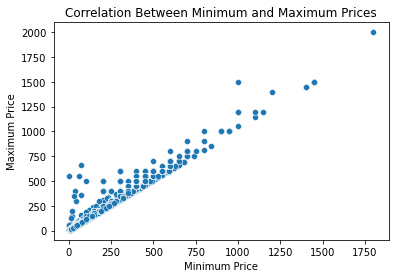

In [12]:
# Plotting scatter plot between minimum and maximum prices; results are as expected
sns.scatterplot(data=df, x='Min Price', y='Max Price')
plt.title('Correlation Between Minimum and Maximum Prices')
plt.xlabel('Minimum Price')
plt.ylabel('Maximum Price')
plt.show()


In [13]:
# Group data by commodity and calculate total volume sold, average price, minimum price, and maximum price
commodity_summary = df.groupby('Commodity').agg({'Unit': 'count', 'Avg Price': 'mean', 'Min Price': 'min', 'Max Price': 'max'})

In [14]:
# Sort by Total Volume Sold
commodity_summary = commodity_summary.rename(columns={'Unit': 'Total Volume Sold'})
commodity_summary = commodity_summary.sort_values('Total Volume Sold', ascending=False)

In [15]:
# Top 10 selling commodities
top_commodities = commodity_summary.head(10)

print('Top 10 Selling Commodities:')
print(top_commodities)

Top 10 Selling Commodities:
                      Total Volume Sold   Avg Price  Min Price  Max Price
Commodity                                                                
Ginger                             2751   99.197383       40.0      290.0
Cauli Local                        2750   48.801636        8.0      200.0
Cabbage(Local)                     2749   27.553292        5.0      100.0
Chilli Dry                         2748  250.458515       40.0      430.0
Raddish White(Local)               2747   25.980160        5.0       80.0
Potato Red                         2746   35.419337       14.0      115.0
Bamboo Shoot                       2744  101.347485       50.0      550.0
Banana                             2744   78.394133       40.0      550.0
Onion Dry (Indian)                 2742   47.476112       15.0      220.0
Brd Leaf Mustard                   2742   49.762035        1.0      250.0


In [16]:
# Bottom 10 selling commodities
bottom_commodities = commodity_summary.tail(10)

print('\nBottom 10 Selling Commodities:')
print(bottom_commodities)


Bottom 10 Selling Commodities:
                     Total Volume Sold   Avg Price  Min Price  Max Price
Commodity                                                               
Onion Dry (Chinese)                108   87.611111       45.0      165.0
Mandarin                            68   61.985294       35.0       90.0
Mango(Dushari)                      58  101.379310       70.0      150.0
Water Melon(Dotted)                 42   32.904762       25.0       55.0
Litchi(Indian)                      41  142.621951      120.0      200.0
Maize                               24    9.875000        5.0       75.0
Mango(Calcutte)                     23  133.913043      120.0      150.0
Sweet Lime                          14   61.607143       25.0      100.0
Musk Melon                          10   39.400000       15.0       70.0
Mango(Chousa)                        2  135.000000      120.0      150.0


To me, this appears quite logical. The commodities that are frequently used in Nepali cuisine tend to have higher demand and sales. On the other hand, the ones that are purchased infrequently, especially those with higher prices, may be considered luxury products by many Nepalis based on their income levels.

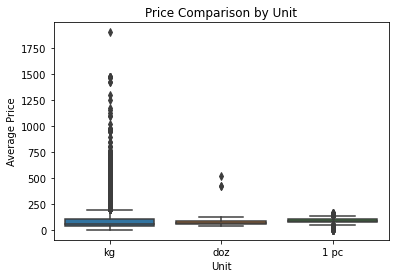

In [17]:
# Box plot to compare prices by unit
sns.boxplot(data=df, x='Unit', y='Avg Price')
plt.title('Price Comparison by Unit')
plt.xlabel('Unit')
plt.ylabel('Average Price')
plt.show()


In [18]:
#Checking for outliers
Q1 = df['Min Price'].quantile(0.25)
Q3 = df['Min Price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Min Price'] < (Q1 - 1.5 * IQR)) | (df['Min Price'] > (Q3 + 1.5 * IQR))]

print(outliers)


                  Commodity       Date Unit  Min Price  Max Price  Avg Price
52                     Lime 2013-06-16   kg      200.0      400.0      300.0
53              Pomegranate 2013-06-16   kg      200.0      220.0      210.0
55            Grapes(Green) 2013-06-16   kg      250.0      260.0      255.0
73               Fish Fresh 2013-06-16   kg      210.0      220.0      215.0
125                    Lime 2013-06-17   kg      200.0      400.0      300.0
...                     ...        ...  ...        ...        ...        ...
197155   Garlic Dry Chinese 2021-05-13   kg      240.0      250.0      245.0
197157     Fish Fresh(Rahu) 2021-05-13   kg      270.0      280.0      275.0
197158  Fish Fresh(Bachuwa) 2021-05-13   kg      225.0      235.0      230.0
197159   Fish Fresh(Chhadi) 2021-05-13   kg      220.0      230.0      225.0
197160  Fish Fresh(Mungari) 2021-05-13   kg      240.0      250.0      245.0

[18449 rows x 6 columns]


In [19]:
# Set the Date column as the index of the dataframe
df = df.set_index('Date')

In [20]:
# Create a new dataframe with only the Average Price column
df_avg_price = df[['Avg Price']]

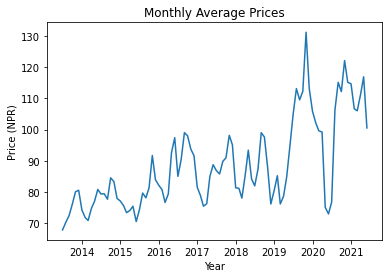

In [21]:
# Resample the data to monthly frequency and calculate the mean
df_avg_price_monthly = df_avg_price.resample('M').mean()

# Plot the monthly average prices
plt.plot(df_avg_price_monthly)
plt.title('Monthly Average Prices')
plt.xlabel('Year')
plt.ylabel('Price (NPR)')
plt.show()

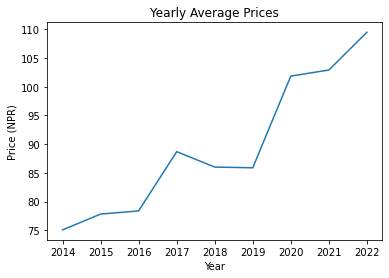

In [22]:
# Resample the data to yearly frequency and calculate the mean
df_avg_price_yearly = df_avg_price.resample('Y').mean()

# Plot the yearly average prices
plt.plot(df_avg_price_yearly)
plt.title('Yearly Average Prices')
plt.xlabel('Year')
plt.ylabel('Price (NPR)')
plt.show()


In [23]:
# Seasonal decomposition on the data
decomposition = seasonal_decompose(df_avg_price_monthly, model='multiplicative', period=12)

In [24]:
# Plotting the seasonal decomposition
# Trend component shows long-term behavior
# Seasonal component represents repeats at fixed intervals
# Residual component represents random fluctuations
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

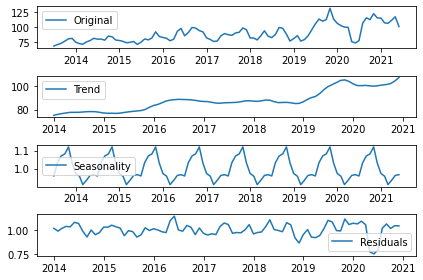

In [25]:
#Plotting
plt.subplot(411)
plt.plot(df_avg_price_monthly, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [26]:
# Filter data to only include top 10 selling commodities
top_commodity_names = top_commodities.index.values.tolist()
df_top_commodities = df[df['Commodity'].isin(top_commodity_names)]

In [27]:
# Create pivot table with Date as index, Commodity as columns, and Average Price as values
pivot_table_avg = pd.pivot_table(df_top_commodities, index='Date', columns='Commodity', values='Avg Price', fill_value=0)

In [28]:
#Reshape to show yearly average
pivot_table_avg_yearly = pivot_table_avg.resample('Y').mean()
pivot_table_avg_yearly.round(2)

Commodity,Bamboo Shoot,Banana,Brd Leaf Mustard,Cabbage(Local),Cauli Local,Chilli Dry,Ginger,Onion Dry (Indian),Potato Red,Raddish White(Local)
Date,,,,,,,,,,
2013-12-31,73.89,53.36,38.19,30.79,48.24,180.61,129.14,71.41,30.92,25.83
2014-12-31,113.66,63.78,45.21,20.73,37.36,205.25,128.75,36.23,34.95,17.47
2015-12-31,66.51,71.32,43.80,22.99,34.64,218.47,78.95,54.90,24.81,19.27
2016-12-31,120.36,80.45,51.39,27.45,51.90,274.98,61.33,25.43,32.78,31.88
2017-12-31,124.83,74.16,45.54,25.94,48.20,233.50,51.31,38.36,27.08,20.61
2018-12-31,83.44,84.10,58.19,32.23,51.28,206.18,87.06,36.54,38.10,27.75
2019-12-31,114.29,89.45,63.28,29.96,63.35,268.40,168.39,58.22,37.79,35.05
2020-12-31,104.47,83.31,43.48,33.06,56.54,341.93,118.70,66.97,54.75,24.64
2021-12-31,80.87,102.31,49.32,21.28,38.29,318.48,68.75,54.68,31.67,34.75


The above pivot table shows the average prices for each (top 10) commodity across all units by year. 

Let's create a pivot table to show the average price for each combination of commodity and unit.

In [29]:
# Create pivot table
commodity_pivot = pd.pivot_table(df, values='Avg Price', index='Commodity', columns='Unit', aggfunc=np.mean)

# Print pivot table
pd.set_option('display.max_rows', None)
commodity_pivot.round(2)


Unit,1 pc,doz,kg
Commodity,,,
Apple(Fuji),NaN,NaN,280.03
Apple(Jholey),NaN,NaN,122.28
Arum,NaN,NaN,42.60
Asparagus,NaN,NaN,321.65
Bakula,NaN,NaN,67.07
Bamboo Shoot,NaN,NaN,101.35
Banana,NaN,78.39,NaN
Barela,NaN,NaN,44.12
Bauhania Flower,NaN,NaN,119.17


Further areas of exploration include examining the trends and seasonality in the prices of specific commodities, identifying price trends and patterns over time, exploring the relationship between the prices of different commodities (substitutes vs complementary commodities), and identifying factors that may influence the prices. Additionally, external data sources such as weather data, transportation costs, and economic indicators can also be incorporated for more information!

#### Dataset
<a href="https://www.kaggle.com/datasets/ramkrijal/agriculture-vegetables-fruits-time-series-prices"> Time Series Price Vegetables Fruits Dataset</a>